In [1]:
import requests
import pandas as pd
from secret import keys

In [2]:
api_key = keys.API_KEY

In [3]:
base_url = 'https://api.eia.gov/v2/electricity/rto/fuel-type-data/data'

## Sun, Natural Gas, Coal

In [7]:
params = {
    'api_key': api_key,
    "frequency": "hourly", # pulling data in hourly.
    "data[]": "value", # amount of energy produced or consumed?
    "facets[fueltype][]":["SUN", "NG", "COL"], # energy source (solar)
    "facets[respondent][]": "SOCO", # recording location of data (Southern Company)
    "start": "2021-07-01", # Time frame to pull data (start and end date)
    "end": "2022-07-29",
    "offset": 0
}

In [8]:
dfs = []
for off in range(0, 30000, 5000):
    
    params["offset"] = off
    
    resp = requests.get(base_url, params=params)
    
    data = resp.json()
    
    df = pd.DataFrame(data['response']['data'])
    
    dfs.append(df)

In [9]:
df2 = pd.pivot(data=pd.concat(dfs), index='period', columns='fueltype', values='value')
df2

fueltype,COL,NG,SUN
period,,,
2021-07-01T00,9464,20540,177
2021-07-01T01,9382,19923,32
2021-07-01T02,9286,18983,0
2021-07-01T03,9163,17476,0
2021-07-01T04,8195,15457,0
...,...,...,...
2022-07-28T19,7925,24374,2484
2022-07-28T20,7932,24744,2221
2022-07-28T21,7993,25403,1797


In [8]:
df2.index = pd.to_datetime(df2.index)

In [ ]:
# saved the dataframe to my desktop
df2.to_csv('../data/df2.csv')

<AxesSubplot:xlabel='period'>

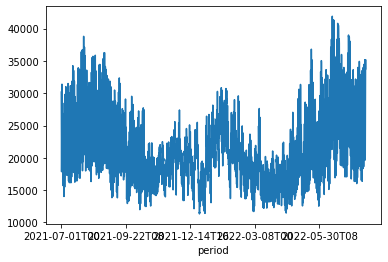

In [20]:
(df2['COL'] + df2['NG'] + df2['SUN']).plot()

## Solar

In [57]:
params_sun = {
    'api_key': api_key,
    "frequency": "hourly", # pulling data in hourly.
    "data[]": "value", # amount of energy produced or consumed?
    "facets[fueltype][]":"SUN",# energy source (solar)
    "facets[respondent][]": "SOCO", # recording location of data (Southern Company)
    "start": "2020-07-01", # Time frame to pull data (start and end date)
    "end": "2022-07-29",
    "offset": 0
}

In [58]:
#resp_nuc = requests.get(base_url, params=params_nuc)

In [59]:
#resp_nuc.status_code

In [61]:
dfs_sun = []
for off in range(0, 30000, 5000):
    
    params_sun["offset"] = off
    
    resp_sun = requests.get(base_url, params=params_sun)
    
    data_sun = resp_sun.json()
    
    df_sun = pd.DataFrame(data_sun['response']['data'])
    
    dfs_sun.append(df_sun)

In [62]:
df_sun = pd.concat(dfs_sun)
df_sun

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2020-07-01T00,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,137,megawatthours
1,2020-07-01T01,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,24,megawatthours
2,2020-07-01T02,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,0,megawatthours
3,2020-07-01T03,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,0,megawatthours
4,2020-07-01T04,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,0,megawatthours
...,...,...,...,...,...,...,...
3187,2022-07-28T19,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,2484,megawatthours
3188,2022-07-28T20,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,2221,megawatthours
3189,2022-07-28T21,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,1797,megawatthours
3190,2022-07-28T22,SOCO,"Southern Company Services, Inc. - Trans",SUN,Solar,1662,megawatthours


In [63]:
df_sun = df_sun[['period', 'value']]
df_sun

,period,value
0,2020-07-01T00,137
1,2020-07-01T01,24
2,2020-07-01T02,0
3,2020-07-01T03,0
4,2020-07-01T04,0
...,...,...
3187,2022-07-28T19,2484
3188,2022-07-28T20,2221
3189,2022-07-28T21,1797
3190,2022-07-28T22,1662


In [17]:
# df_nuc.index = pd.to_datetime(df_nuc.index)
# df_nuc.head(3)

In [64]:
df_sun.to_csv('../data/df_sun.csv')

## Natural Gas

In [65]:
params_ng = {
    'api_key': api_key,
    "frequency": "hourly", # pulling data in hourly.
    "data[]": "value", # amount of energy produced or consumed?
    "facets[fueltype][]":"NG",# energy source (solar)
    "facets[respondent][]": "SOCO", # recording location of data (Southern Company)
    "start": "2020-07-01", # Time frame to pull data (start and end date)
    "end": "2022-07-29",
    "offset": 0
}

In [66]:
dfs_ng = []
for off in range(0, 30000, 5000):
    
    params_ng["offset"] = off
    
    resp_ng = requests.get(base_url, params=params_ng)
    
    data_ng = resp_ng.json()
    
    df_ng = pd.DataFrame(data_ng['response']['data'])
    
    dfs_ng.append(df_ng)

In [67]:
df_ng = pd.concat(dfs_ng)
df_ng

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2020-07-01T00,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,20459,megawatthours
1,2020-07-01T01,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,19832,megawatthours
2,2020-07-01T02,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,19002,megawatthours
3,2020-07-01T03,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,17723,megawatthours
4,2020-07-01T04,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,16316,megawatthours
...,...,...,...,...,...,...,...
3187,2022-07-28T19,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,24374,megawatthours
3188,2022-07-28T20,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,24744,megawatthours
3189,2022-07-28T21,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,25403,megawatthours
3190,2022-07-28T22,SOCO,"Southern Company Services, Inc. - Trans",NG,Natural gas,24684,megawatthours


In [68]:
df_ng = df_ng[['period', 'value']]
df_ng

,period,value
0,2020-07-01T00,20459
1,2020-07-01T01,19832
2,2020-07-01T02,19002
3,2020-07-01T03,17723
4,2020-07-01T04,16316
...,...,...
3187,2022-07-28T19,24374
3188,2022-07-28T20,24744
3189,2022-07-28T21,25403
3190,2022-07-28T22,24684


In [69]:
df_ng.to_csv('../data/df_ng.csv')

## Coal

In [70]:
params_col = {
    'api_key': api_key,
    "frequency": "hourly", # pulling data in hourly.
    "data[]": "value", # amount of energy produced or consumed?
    "facets[fueltype][]":"COL",# energy source (solar)
    "facets[respondent][]": "SOCO", # recording location of data (Southern Company)
    "start": "2020-07-01", # Time frame to pull data (start and end date)
    "end": "2022-07-29",
    "offset": 0
}

In [71]:
dfs_col = []
for off in range(0, 30000, 5000):
    
    params_col["offset"] = off
    
    resp_col = requests.get(base_url, params=params_col)
    
    data_col = resp_col.json()
    
    df_col = pd.DataFrame(data_col['response']['data'])
    
    dfs_col.append(df_col)

In [72]:
df_col = pd.concat(dfs_col)
df_col

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2020-07-01T00,SOCO,"Southern Company Services, Inc. - Trans",COL,Coal,6554,megawatthours
1,2020-07-01T01,SOCO,"Southern Company Services, Inc. - Trans",COL,Coal,6128,megawatthours
2,2020-07-01T02,SOCO,"Southern Company Services, Inc. - Trans",COL,Coal,6406,megawatthours
3,2020-07-01T03,SOCO,"Southern Company Services, Inc. - Trans",COL,Coal,5964,megawatthours
4,2020-07-01T04,SOCO,"Southern Company Services, Inc. - Trans",COL,Coal,4940,megawatthours
...,...,...,...,...,...,...,...
3187,2022-07-28T19,SOCO,"Southern Company Services, Inc. - Trans",COL,Coal,7925,megawatthours
3188,2022-07-28T20,SOCO,"Southern Company Services, Inc. - Trans",COL,Coal,7932,megawatthours
3189,2022-07-28T21,SOCO,"Southern Company Services, Inc. - Trans",COL,Coal,7993,megawatthours
3190,2022-07-28T22,SOCO,"Southern Company Services, Inc. - Trans",COL,Coal,7913,megawatthours


In [73]:
df_col = df_col[['period', 'value']]
df_col

,period,value
0,2020-07-01T00,6554
1,2020-07-01T01,6128
2,2020-07-01T02,6406
3,2020-07-01T03,5964
4,2020-07-01T04,4940
...,...,...
3187,2022-07-28T19,7925
3188,2022-07-28T20,7932
3189,2022-07-28T21,7993
3190,2022-07-28T22,7913


In [74]:
df_col.to_csv('../data/df_col.csv')

## Nuclear

In [10]:
params_nuc = {
    'api_key': api_key,
    "frequency": "hourly", # pulling data in hourly.
    "data[]": "value", # amount of energy produced or consumed?
    "facets[fueltype][]":"NUC", # energy source (solar)
    "facets[respondent][]": "SOCO", # recording location of data (Southern Company)
    "start": "2020-07-01", # Time frame to pull data (start and end date)
    "end": "2022-07-29",
    "offset": 0
}

In [11]:
resp_nuc = requests.get(base_url, params=params_nuc)

In [12]:
resp_nuc.status_code

200

In [13]:
dfs_nuc = []
for off in range(0, 30000, 5000):
    
    params_nuc["offset"] = off
    
    resp_nuc = requests.get(base_url, params=params_nuc)
    
    data_nuc = resp_nuc.json()
    
    df_nuc = pd.DataFrame(data_nuc['response']['data'])
    
    dfs_nuc.append(df_nuc)

In [15]:
df_nuc = pd.concat(dfs_nuc)
df_nuc

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2020-07-01T00,SOCO,"Southern Company Services, Inc. - Trans",NUC,Nuclear,5819,megawatthours
1,2020-07-01T01,SOCO,"Southern Company Services, Inc. - Trans",NUC,Nuclear,5828,megawatthours
2,2020-07-01T02,SOCO,"Southern Company Services, Inc. - Trans",NUC,Nuclear,5846,megawatthours
3,2020-07-01T03,SOCO,"Southern Company Services, Inc. - Trans",NUC,Nuclear,5846,megawatthours
4,2020-07-01T04,SOCO,"Southern Company Services, Inc. - Trans",NUC,Nuclear,5846,megawatthours
...,...,...,...,...,...,...,...
3187,2022-07-28T19,SOCO,"Southern Company Services, Inc. - Trans",NUC,Nuclear,5867,megawatthours
3188,2022-07-28T20,SOCO,"Southern Company Services, Inc. - Trans",NUC,Nuclear,5865,megawatthours
3189,2022-07-28T21,SOCO,"Southern Company Services, Inc. - Trans",NUC,Nuclear,5855,megawatthours
3190,2022-07-28T22,SOCO,"Southern Company Services, Inc. - Trans",NUC,Nuclear,5851,megawatthours


In [16]:
df_nuc = df_nuc[['period', 'value']]
df_nuc.head(3)

,period,value
0,2020-07-01T00,5819
1,2020-07-01T01,5828
2,2020-07-01T02,5846


In [17]:
# df_nuc.index = pd.to_datetime(df_nuc.index)
# df_nuc.head(3)

In [18]:
df_nuc.to_csv('../data/df_nuc.csv')

## Oil

In [21]:
params_oil = {
    'api_key': api_key,
    "frequency": "hourly", # pulling data in hourly.
    "data[]": "value", # amount of energy produced or consumed?
    "facets[fueltype][]":"OIL", # energy source (solar)
    "facets[respondent][]": "SOCO", # recording location of data (Southern Company)
    "start": "2020-07-01", # Time frame to pull data (start and end date)
    "end": "2022-07-29",
    "offset": 0
}

In [22]:
dfs_oil = []
for off in range(0, 30000, 5000):
    
    params_oil["offset"] = off
    
    resp_oil = requests.get(base_url, params=params_oil)
    
    data_oil = resp_oil.json()
    
    df_oil = pd.DataFrame(data_oil['response']['data'])
    
    dfs_oil.append(df_oil)

In [31]:
df_oil = pd.concat(dfs_oil)
df_oil

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2020-07-01T00,SOCO,"Southern Company Services, Inc. - Trans",OIL,Petroleum,0,megawatthours
1,2020-07-01T01,SOCO,"Southern Company Services, Inc. - Trans",OIL,Petroleum,-2,megawatthours
2,2020-07-01T02,SOCO,"Southern Company Services, Inc. - Trans",OIL,Petroleum,0,megawatthours
3,2020-07-01T03,SOCO,"Southern Company Services, Inc. - Trans",OIL,Petroleum,0,megawatthours
4,2020-07-01T04,SOCO,"Southern Company Services, Inc. - Trans",OIL,Petroleum,-1,megawatthours
...,...,...,...,...,...,...,...
3187,2022-07-28T19,SOCO,"Southern Company Services, Inc. - Trans",OIL,Petroleum,0,megawatthours
3188,2022-07-28T20,SOCO,"Southern Company Services, Inc. - Trans",OIL,Petroleum,-1,megawatthours
3189,2022-07-28T21,SOCO,"Southern Company Services, Inc. - Trans",OIL,Petroleum,0,megawatthours
3190,2022-07-28T22,SOCO,"Southern Company Services, Inc. - Trans",OIL,Petroleum,0,megawatthours


In [28]:
df_oil.isna().sum()

period             0
respondent         0
respondent-name    0
fueltype           0
type-name          0
value              0
value-units        0
dtype: int64

In [29]:
df_oil = df_oil[['period', 'value']]
df_oil.head(3)

,period,value
0,2020-07-01T00,0
1,2020-07-01T01,-2
2,2020-07-01T02,0


In [30]:
df_oil.to_csv('../data/df_oil.csv')

## Hydro

In [32]:
params_hydro = {
    'api_key': api_key,
    "frequency": "hourly", # pulling data in hourly.
    "data[]": "value", # amount of energy produced or consumed?
    "facets[fueltype][]":"WAT", # energy source (solar)
    "facets[respondent][]": "SOCO", # recording location of data (Southern Company)
    "start": "2020-07-01", # Time frame to pull data (start and end date)
    "end": "2022-07-29",
    "offset": 0
}

In [33]:
dfs_hydro = []
for off in range(0, 30000, 5000):
    
    params_hydro["offset"] = off
    
    resp_hydro = requests.get(base_url, params=params_hydro)
    
    data_hydro = resp_hydro.json()
    
    df_hydro = pd.DataFrame(data_hydro['response']['data'])
    
    dfs_hydro.append(df_hydro)

In [34]:
df_hydro = pd.concat(dfs_hydro)
df_hydro

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2020-07-01T00,SOCO,"Southern Company Services, Inc. - Trans",WAT,Hydro,1992,megawatthours
1,2020-07-01T01,SOCO,"Southern Company Services, Inc. - Trans",WAT,Hydro,1268,megawatthours
2,2020-07-01T02,SOCO,"Southern Company Services, Inc. - Trans",WAT,Hydro,1163,megawatthours
3,2020-07-01T03,SOCO,"Southern Company Services, Inc. - Trans",WAT,Hydro,1157,megawatthours
4,2020-07-01T04,SOCO,"Southern Company Services, Inc. - Trans",WAT,Hydro,1087,megawatthours
...,...,...,...,...,...,...,...
3187,2022-07-28T19,SOCO,"Southern Company Services, Inc. - Trans",WAT,Hydro,1284,megawatthours
3188,2022-07-28T20,SOCO,"Southern Company Services, Inc. - Trans",WAT,Hydro,1846,megawatthours
3189,2022-07-28T21,SOCO,"Southern Company Services, Inc. - Trans",WAT,Hydro,2315,megawatthours
3190,2022-07-28T22,SOCO,"Southern Company Services, Inc. - Trans",WAT,Hydro,2416,megawatthours


In [35]:
df_hydro = df_hydro[['period', 'value']]
df_hydro.head(3)

,period,value
0,2020-07-01T00,1992
1,2020-07-01T01,1268
2,2020-07-01T02,1163


In [36]:
df_hydro.to_csv('../data/df_hydro.csv')

## Wind

In [37]:
params_wind = {
    'api_key': api_key,
    "frequency": "hourly", # pulling data in hourly.
    "data[]": "value", # amount of energy produced or consumed?
    "facets[fueltype][]":"WND", # energy source (solar)
    "facets[respondent][]": "SOCO", # recording location of data (Southern Company)
    "start": "2020-07-01", # Time frame to pull data (start and end date)
    "end": "2022-07-29",
    "offset": 0
}

In [38]:
dfs_wind = []
for off in range(0, 30000, 5000):
    
    params_wind["offset"] = off
    
    resp_wind = requests.get(base_url, params=params_wind)
    
    data_wind = resp_wind.json()
    
    df_wind = pd.DataFrame(data_wind['response']['data'])
    
    dfs_wind.append(df_wind)

In [39]:
df_wind = pd.concat(dfs_wind)
df_wind

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2020-07-01T00,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
1,2020-07-01T01,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
2,2020-07-01T02,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
3,2020-07-01T03,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
4,2020-07-01T04,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
...,...,...,...,...,...,...,...
3187,2022-07-28T19,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
3188,2022-07-28T20,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
3189,2022-07-28T21,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours
3190,2022-07-28T22,SOCO,"Southern Company Services, Inc. - Trans",WND,Wind,0,megawatthours


In [40]:
df_wind = df_wind[['period', 'value']]
df_wind.head(3)

,period,value
0,2020-07-01T00,0
1,2020-07-01T01,0
2,2020-07-01T02,0


In [41]:
df_wind.to_csv('../data/df_wind.csv')

## Other

In [42]:
params_oth = {
    'api_key': api_key,
    "frequency": "hourly", # pulling data in hourly.
    "data[]": "value", # amount of energy produced or consumed?
    "facets[fueltype][]":"OTH", # energy source (solar)
    "facets[respondent][]": "SOCO", # recording location of data (Southern Company)
    "start": "2020-07-01", # Time frame to pull data (start and end date)
    "end": "2022-07-29",
    "offset": 0
}

In [43]:
dfs_oth = []
for off in range(0, 30000, 5000):
    
    params_oth["offset"] = off
    
    resp_oth = requests.get(base_url, params=params_oth)
    
    data_oth = resp_oth.json()
    
    df_oth = pd.DataFrame(data_oth['response']['data'])
    
    dfs_oth.append(df_oth)

In [44]:
df_oth = pd.concat(dfs_oth)

In [45]:
df_oth

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2020-07-01T00,SOCO,"Southern Company Services, Inc. - Trans",OTH,Other,311,megawatthours
1,2020-07-01T01,SOCO,"Southern Company Services, Inc. - Trans",OTH,Other,316,megawatthours
2,2020-07-01T02,SOCO,"Southern Company Services, Inc. - Trans",OTH,Other,311,megawatthours
3,2020-07-01T03,SOCO,"Southern Company Services, Inc. - Trans",OTH,Other,308,megawatthours
4,2020-07-01T04,SOCO,"Southern Company Services, Inc. - Trans",OTH,Other,309,megawatthours
...,...,...,...,...,...,...,...
3187,2022-07-28T19,SOCO,"Southern Company Services, Inc. - Trans",OTH,Other,383,megawatthours
3188,2022-07-28T20,SOCO,"Southern Company Services, Inc. - Trans",OTH,Other,378,megawatthours
3189,2022-07-28T21,SOCO,"Southern Company Services, Inc. - Trans",OTH,Other,352,megawatthours
3190,2022-07-28T22,SOCO,"Southern Company Services, Inc. - Trans",OTH,Other,355,megawatthours


In [46]:
df_oth = df_oth[['period', 'value']]
df_oth.head(3)

,period,value
0,2020-07-01T00,311
1,2020-07-01T01,316
2,2020-07-01T02,311


In [47]:
df_oth.to_csv('../data/df_oth.csv')

## Demand

In [48]:
params_dem = {
    'api_key': api_key,
    "frequency": "hourly", # pulling data in hourly.
    "data[]": "value", # amount of energy produced or consumed?
    "facets[type][]":"D", # energy source (solar)
    "facets[respondent][]": "SOCO", # recording location of data (Southern Company)
    "start": "2020-07-01", # Time frame to pull data (start and end date)
    "end": "2022-07-29",
    "offset": 0
}

In [49]:
dfs_dem = []
for off in range(0, 15000, 5000):
    
    params_dem["offset"] = off
    
    resp_dem = requests.get("https://api.eia.gov/v2/electricity/rto/region-data/data/", params=params_dem)
    
    data_dem = resp_dem.json()
    
    df_dem = pd.DataFrame(data_dem['response']['data'])
    
    dfs_dem.append(df_dem)

In [50]:
df_dem = pd.concat(dfs_dem)
df_dem

,period,respondent,respondent-name,type,type-name,value,value-units
0,2020-07-01T00,SOCO,"Southern Company Services, Inc. - Trans",D,Demand,34571,megawatthours
1,2020-07-01T01,SOCO,"Southern Company Services, Inc. - Trans",D,Demand,33087,megawatthours
2,2020-07-01T02,SOCO,"Southern Company Services, Inc. - Trans",D,Demand,32419,megawatthours
3,2020-07-01T03,SOCO,"Southern Company Services, Inc. - Trans",D,Demand,30478,megawatthours
4,2020-07-01T04,SOCO,"Southern Company Services, Inc. - Trans",D,Demand,28226,megawatthours
...,...,...,...,...,...,...,...
4995,2022-03-17T19,SOCO,"Southern Company Services, Inc. - Trans",D,Demand,24393,megawatthours
4996,2022-03-17T20,SOCO,"Southern Company Services, Inc. - Trans",D,Demand,24505,megawatthours
4997,2022-03-17T21,SOCO,"Southern Company Services, Inc. - Trans",D,Demand,24799,megawatthours
4998,2022-03-17T22,SOCO,"Southern Company Services, Inc. - Trans",D,Demand,25043,megawatthours


In [51]:
df_dem = df_dem[['period', 'value']]
df_dem.head(3)

,period,value
0,2020-07-01T00,34571
1,2020-07-01T01,33087
2,2020-07-01T02,32419


In [52]:
df_dem.to_csv('../data/df_dem.csv')